# Logistic Regression

Using Logistic Regression to predict Hypothyroidism with sklearn

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Data prep

In [10]:
names = 'response age sex on_thyroxine query_on_thyroxine antithyroid_medication thyroid_surgery query_hypothyroid query_hyperthyroid pregnant \
sick tumor lithium goitre TSH_measured TSH T3_measured \
T3 TT4_measured TT4 T4U_measured T4U FTI_measured FTI TBG_measured TBG'

names = names.split()

In [11]:
df = pd.read_csv('data/hypothyroid.csv', index_col=False, names=names, na_values=['?'])
df.head()

,response,age,sex,on_thyroxine,query_on_thyroxine,antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,...,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,...,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,...,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,...,y,0.4,y,6.0,y,1.04,y,6.0,n,NaN
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,...,y,1.2,y,57.0,y,1.28,y,44.0,n,NaN


In [12]:
df.shape

(3163, 26)

In [13]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,2717.000000,2695.000000,2468.000000,2914.000000,2915.000000,2916.000000,260.000000
mean,51.154214,5.923180,1.939749,108.850000,0.978199,115.397771,31.283077
std,19.294405,23.899467,0.996773,45.485419,0.226580,60.239572,19.224659
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,1.400000,83.000000,0.850000,91.000000,21.000000
50%,54.000000,0.700000,1.800000,104.000000,0.960000,107.000000,28.000000
75%,67.000000,2.300000,2.300000,128.000000,1.065000,129.000000,34.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000,122.000000


In [14]:
to_drop = list()

for c in df.columns:
    if 'measured' in c or 'query' in c:
        to_drop.append(c)

In [15]:
to_drop.append('TBG')
df.drop(to_drop, axis=1, inplace=True)
df.shape

(3163, 16)

In [16]:
df.head()

,response,age,sex,on_thyroxine,antithyroid_medication,thyroid_surgery,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48,10.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,145.0,1.7,19.0,1.13,17.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,0.0,0.2,4.0,1.00,0.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,430.0,0.4,6.0,1.04,6.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,7.3,1.2,57.0,1.28,44.0


### Checking & processing for missing data

In [17]:
df.isna().sum()

response                    0
age                       446
sex                        73
on_thyroxine                0
antithyroid_medication      0
thyroid_surgery             0
pregnant                    0
sick                        0
tumor                       0
lithium                     0
goitre                      0
TSH                       468
T3                        695
TT4                       249
T4U                       248
FTI                       247
dtype: int64

In [18]:
df.dropna(inplace=True)

In [19]:
df.shape

(2000, 16)

### Transforming target string to 1 or 0

In [20]:
def encode_chars(char):
    if char == 'hypothyroid':
        return 1
    else:
        return 0

In [21]:
df['response'] = df['response'].apply(encode_chars)

In [22]:
df.head()

,response,age,sex,on_thyroxine,antithyroid_medication,thyroid_surgery,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,1,72.0,M,f,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48,10.0
1,1,15.0,F,t,f,f,f,f,f,f,f,145.0,1.7,19.0,1.13,17.0
2,1,24.0,M,f,f,f,f,f,f,f,f,0.0,0.2,4.0,1.00,0.0
3,1,24.0,F,f,f,f,f,f,f,f,f,430.0,0.4,6.0,1.04,6.0
4,1,77.0,M,f,f,f,f,f,f,f,f,7.3,1.2,57.0,1.28,44.0


### EDA

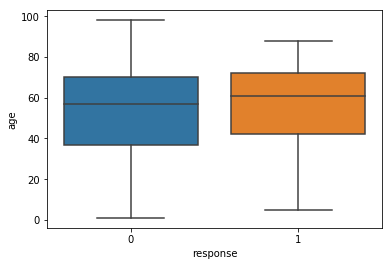

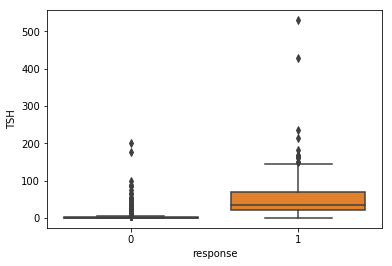

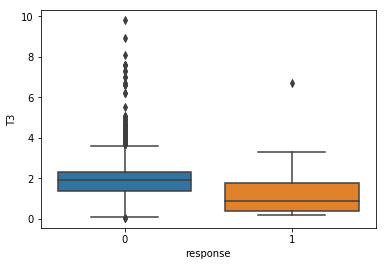

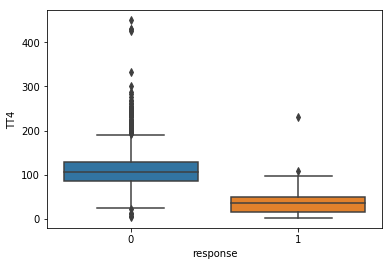

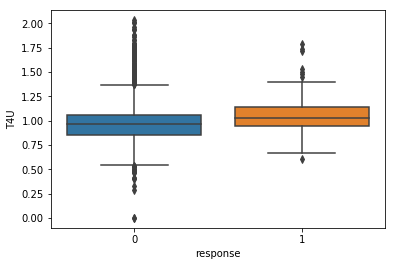

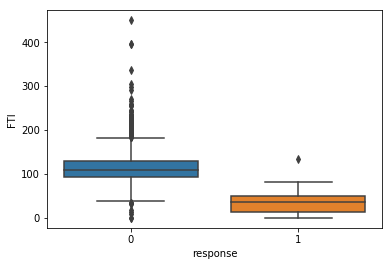

In [23]:
for var in ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']:
    sns.boxplot(x='response', y=var, data=df)
    plt.show()

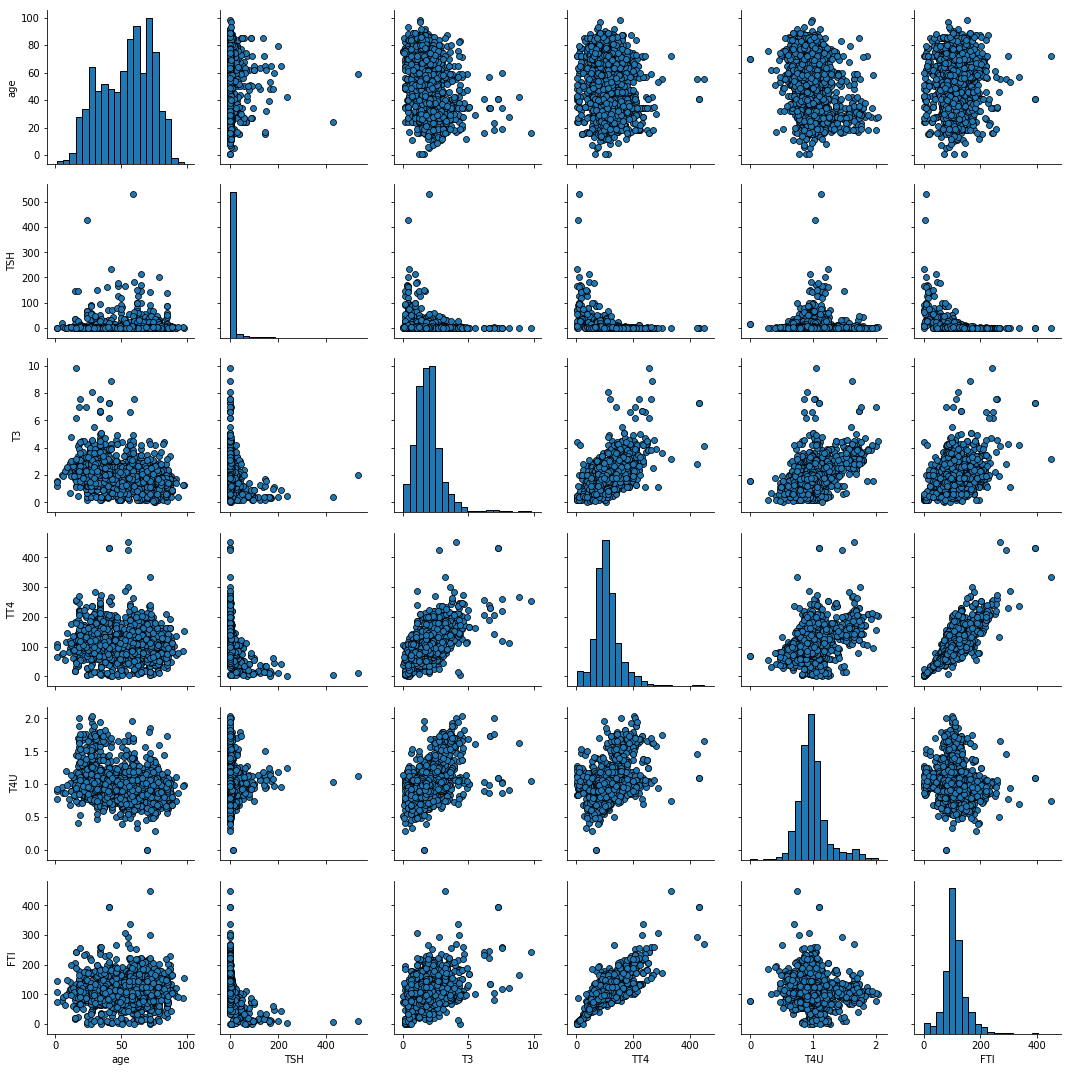

In [24]:
sns.pairplot(data=df[df.columns[1:]], diag_kws={'edgecolor': 'k', 'bins': 20},
             plot_kws={'edgecolor': 'k'})
plt.show()

### One-hot encoding

In [25]:
df_dummies = pd.get_dummies(data=df)
df_dummies.shape

(2000, 25)

In [26]:
df_dummies.sample(10)

,response,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_f,...,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t
2697,0,67.0,0.9,1.5,129.0,1.14,113.0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
164,0,28.0,0.0,1.6,79.0,1.07,74.0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
1555,0,66.0,11.0,1.4,68.0,0.97,70.0,0,1,1,...,1,0,1,0,1,0,1,0,1,0
1704,0,80.0,0.0,1.0,86.0,0.64,134.0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
645,0,43.0,0.7,0.8,72.0,0.69,105.0,0,1,1,...,1,0,1,0,1,0,1,0,1,0
3066,0,74.0,21.0,1.8,126.0,1.18,107.0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
2386,0,80.0,4.7,1.5,131.0,1.05,125.0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
2728,0,62.0,1.2,1.0,97.0,0.98,93.0,0,1,1,...,1,0,0,1,1,0,1,0,1,0
111,1,53.0,34.0,1.2,44.0,1.07,41.0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
2300,0,78.0,2.4,1.3,87.0,0.89,97.0,0,1,1,...,1,0,1,0,1,0,1,0,1,0


### Train-test split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df_dummies.drop('response', axis=1),
                                                    df_dummies['response'], test_size=0.2)

In [29]:
X_train.shape, X_test.shape

((1600, 24), (400, 24))

### Using Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
clf_1 = LogisticRegression(penalty='l2', solver='newton-cg')

In [32]:
clf_1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

### Intercept, Coefficients, Score

In [33]:
clf_1.intercept_

array([2.82135704])

In [34]:
clf_1.coef_

array([[ 0.01889645,  0.01767595, -0.26584415,  0.00378395,  0.18538143,
        -0.1010313 ,  0.1283772 , -0.12837721,  0.31772605, -0.31772606,
         0.84915697, -0.84915698, -0.73361018,  0.73361017,  0.16985744,
        -0.16985745,  0.20452247, -0.20452248,  0.11260633, -0.11260634,
         0.00799542, -0.00799543, -0.52019842,  0.52019841]])

In [35]:
clf_1.score(X_test, y_test)

0.98

### Raw probability values

In [39]:
thresh = 0.5

prob_df = pd.DataFrame(clf_1.predict_proba(X_test[20:30]), columns=['Prob No', 'Prob Yes'])
prob_df['decision'] = (prob_df['Prob Yes'] > thresh).apply(int)

In [40]:
prob_df

,Prob No,Prob Yes,decision
0,0.983385,0.016615,0
1,0.998987,0.001013,0
2,0.998851,0.001149,0
3,0.999819,0.000181,0
4,0.999300,0.000700,0
5,0.997451,0.002549,0
6,0.993896,0.006104,0
7,0.999994,0.000006,0
8,0.999914,0.000086,0
9,0.819567,0.180433,0


In [41]:
y_test[20:30]

3148    0
2115    0
2158    0
612     0
1851    0
2342    0
2726    0
2306    0
1998    0
2083    0
Name: response, dtype: int64

### Classification report

In [42]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [43]:
print(classification_report(y_test, clf_1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       377
           1       1.00      0.65      0.79        23

    accuracy                           0.98       400
   macro avg       0.99      0.83      0.89       400
weighted avg       0.98      0.98      0.98       400



In [44]:
print(confusion_matrix(y_test, clf_1.predict(X_test)))

[[377   0]
 [  8  15]]
